#### Torch Optimization

Below, we see two examples, first one where we use the Torch framework with its predefined functions to iteratively find a Matrix A such that Ax = b is true for given x and b. 

The second example, is one where we implement the functions ourselves, without `torch.nn` to solve some linear regression problem. 

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [20]:
#Simple affine linear model between R^n and R^m
n = 3
m = 2
toy_model = nn.Linear(n,m) 

#Via the following, we can also see how this transformation looks like
W = toy_model.weight
b = toy_model.bias
print(W,b)

#Now, we can define some input and labels to use for optimization
inputs = torch.arange(n, dtype=torch.float32)
labels = torch.zeros(m)

print(f"Before Training we have: {toy_model(inputs)}")

#We do gradient descent such that our matrix in the end hopefully maps the input to 0

#first, we get the Optimizer, here we use stochastic gradient descent
lossfunction = nn.MSELoss()
toy_optimizer = optim.SGD(toy_model.parameters(), lr=0.01)
#We also need a loss function, here mean squared error
for i in range(100):
    
    #This resets all the Gradients to 0, otherwise PyTorch accumulates gradients
    #meanign that the old gradients are stored and the new ones are added onto them, which is not what we want
    toy_optimizer.zero_grad()
    
    #we pass out input into the function, to get our reference value 
    output = toy_model(inputs)
    
    #Compute the predefined loss of our model
    loss = lossfunction(labels,output)
    
    #Compute the backwards gradients of our loss function w.r.t our (very simple) Weights
    loss.backward()
    
    #Now, we take a step, i.e. we update our weights
    toy_optimizer.step()
    
print(f"After Training we have: {toy_model(inputs)}")

Parameter containing:
tensor([[ 0.2975, -0.0388,  0.2045],
        [-0.4298,  0.4338,  0.5362]], requires_grad=True) Parameter containing:
tensor([0.5055, 0.1175], requires_grad=True)
Before Trainign we have: tensor([0.8756, 1.6238], grad_fn=<ViewBackward0>)
After Trainign we have: tensor([0.0018, 0.0033], grad_fn=<ViewBackward0>)


As we can see, the Optimization approximately worked. We can effectively use PyTorch to give us a Matrix which makes the liear system of equations true. Neat!

We actually dont NEED the predefined functions, as we can see by the following example solving a simple Linear Regression task. 

tensor([[-0.7071],
        [ 0.7071]])
Epoch [1/100], Loss: 20.6050
Epoch [11/100], Loss: 14.6214
Epoch [21/100], Loss: 10.4691
Epoch [31/100], Loss: 7.5681
Epoch [41/100], Loss: 5.5260
Epoch [51/100], Loss: 4.0765
Epoch [61/100], Loss: 3.0382
Epoch [71/100], Loss: 2.2874
Epoch [81/100], Loss: 1.7390
Epoch [91/100], Loss: 1.3343


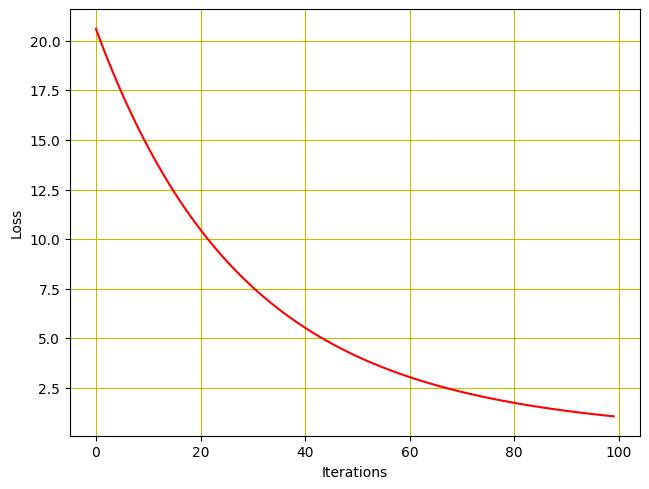

In [124]:
#To solve linear regression with PyTorch, we first need some data
#Below is a simple function allowing for noisy affine linear toy data

n = 2
slope = 4
intercept = 4

def linear_dataset(n,slope, intercept):
    x = torch.linspace(0,99,n,dtype=torch.float32).view(-1,1)
    if n != 1:
        x = (x - x.mean()) / x.std()  # Normalize inputs to make it stable 
    y = slope * x + intercept + (torch.rand(n) * 0.2).view(-1,1)
    return x,y

inputs,labels = linear_dataset(n,slope,intercept)

print(inputs)
#Now, we create the basic functions we used the preimplemented version of above
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

def forward(x):
    return w * x + b

def Mean_squared(pred,label):
    return torch.mean((pred-label)**2) # note that this only is the mean squared error since we work in 1D, otherwise, norms

lr = 0.01
losses_over_time = []
iterations = 100

for i in range(iterations):
    output = forward(inputs)
    
    loss = Mean_squared(output,labels)
    losses_over_time.append(loss.item()) # item turns a tensor with just one element into a scalar         
    loss.backward()
    
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    # zeroing gradients after each iteration, this is what it looks like for non torch.nn objects
    #doing the optimization like this is in general not recommended, using the pytorch fucntions as we did above is better!
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if i % 10 == 0:
        print(f'Epoch [{i+1}/{iterations}], Loss: {loss.item():.4f}')
        
plt.plot(losses_over_time, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


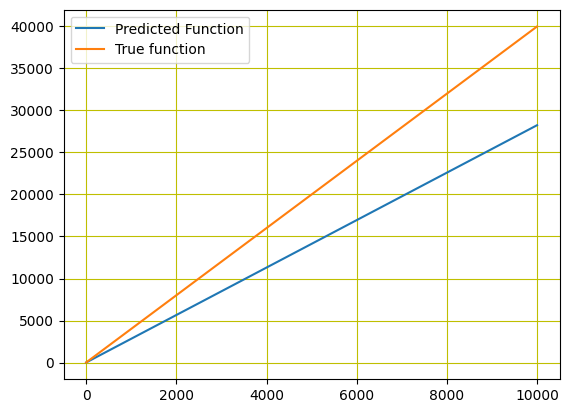

In [125]:
#Lets look at our resulting model
pred = []
true = []
for i in range(10000):
    pred.append(forward(i).detach().numpy())
    true.append(slope*i+intercept)
#as we can see, we perfectly approximate the true function for n or iterations being large enough , 
#if we only have n = 1 or to few iterations, we can see that this is not the case
plt.plot(pred, label='Predicted Function')
plt.plot(true, label='True function')
plt.grid('true', color = 'y')
plt.legend()
plt.show()
    